### This notebook describes the process of interacting with a local nwb file to view, plot various data types from the Mazedataset

In [3]:
from pynwb import NWBHDF5IO, NWBFile
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
from nwbwidgets.utils.timeseries import timeseries_time_to_ind
import numpy as np
from collections import Counter

In [4]:
nwbfileloc = r'C:\Users\Saksham\Documents\NWB\shenoy\data\MazeTask\Jenkins\SpikeSorted\0928\0928_nwb_v5_beforemeeting.nwb'
matfileloc = r'C:\Users\Saksham\Documents\NWB\shenoy\data\MazeTask\Jenkins\SpikeSorted\0928\RC,2009-09-28,1-2.mat'
nwbfile_io = NWBHDF5IO(nwbfileloc,'r')
nwbfile = nwbfile_io.read()

Plotting the different reaches of the monkey for trials given the version and type (barrier locations)

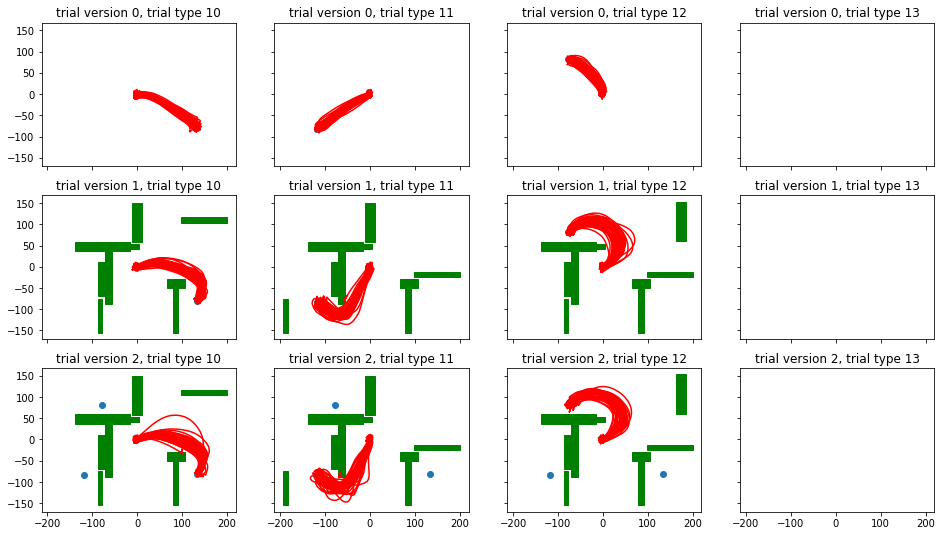

In [41]:
trial_version = range(3)#specify this 
trial_types = range(10,14)#specify this 

trials = nwbfile.trials
cursor = nwbfile.processing['behavior'].data_interfaces['Position'].spatial_series['Cursor']
trials_version_data = trials['trial_version'].data[()]
trials_type_data = trials['trial_type'].data[()]

fig, axs = plt.subplots(len(trial_version), len(trial_types), sharex=True, sharey=True, 
                            figsize=(4*len(trial_types), 3*len(trial_version)))
#plot the barriers and targets for the given trial version and trial type:
for a, trl_ver in enumerate(trial_version):
    for b,trl_type in enumerate(trial_types):
        axs[a,b].set_title(f'trial version {trl_ver}, trial type {trl_type}')
        if np.sum(np.logical_and(trials_version_data==trl_ver,trials_type_data==trl_type))>0:
            rel_row = np.where(np.logical_and(trials_version_data==trl_ver,trials_type_data==trl_type))[0][0]
            target_pos = trials['target_positions'][rel_row]
            barrier_pos = trials['barrier_info'][rel_row]
            target_size = trials['target_size'][rel_row]
            axs[a,b].scatter(target_pos[:, 0], target_pos[:, 1])
            for bar in barrier_pos:
                axs[a,b].add_patch(Rectangle((bar[0]-bar[3],bar[1]-bar[2]),2*bar[3],2*bar[2],color='g'))

for trial_no in range(len(trials)):
    if trials_version_data[trial_no] in trial_version and trials_type_data[trial_no] in trial_types:
        a = trial_version.index(trials_version_data[trial_no])
        b = trial_types.index(trials_type_data[trial_no])
        start_id = timeseries_time_to_ind(cursor,trials['start_time'][trial_no])
        stop_id = timeseries_time_to_ind(cursor, trials['stop_time'][trial_no])
        cursor_trajectory_trial = cursor.data[start_id:stop_id]
        axs[a,b].plot(cursor_trajectory_trial[:,0],cursor_trajectory_trial[:,1],'r')

retrieve lfp data and spike times

In [44]:
lfp_a001 = nwbfile.processing['ecephys'].data_interfaces['Processed']['A001'].data #corresponding to array A and segment 1
lfp_a002 = nwbfile.processing['ecephys'].data_interfaces['Processed']['A002'].data
lfp_b001 = nwbfile.processing['ecephys'].data_interfaces['Processed']['B001'].data
lfp_b002 = nwbfile.processing['ecephys'].data_interfaces['Processed']['B002'].data

spike_times = nwbfile.units['spike_times'] 
# list of spike times. To retrieve times corresponding to first channel of array1:
sp_times_0 = spike_times[0]

522974